#Income Prediction Problem
In this Notebook, I am working through the Income Prediction problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not someone is making more or less than $50,000 a year. While working through this problem, I am following a framework I use to attack all my machine learning problems. It includes the following steps:

1. Load Libraries
2. Load Data
3. Analyze Data
4. Feature Engineering
5. Modeling
6. Algorithm Tuning
7. Finalizing the Model

I hope you enjoy this notebook and find it useful. Please keep in mind this is my first Notebook on here so don't judge it too harshly!

##1. Load Libaraies

First, we need to load all of our libraries we will use for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

##2. Load Data

Next, we load our data.

In [3]:
dataset = pd.read_csv("../../data/adult.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

In [5]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
# Peek at data
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [7]:

# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset['race'] = dataset['race'].apply(lambda x: 1 if x == "White" else 0)

dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,1,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,1,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,0,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,1,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,1,Female,0,3900,40,United-States,0


##3. Analyze Data

In [8]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

###3.1. Numeric Data Analysis

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AttributeError: module 'seaborn' has no attribute 'plt'

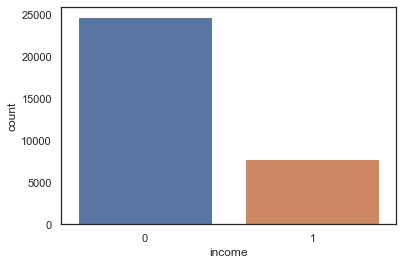

In [9]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
sns.plt.show()

In [ ]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
sns.plt.show()

In [ ]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [ ]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [ ]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

###3.2. Categorical Data Analysis

In [ ]:
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

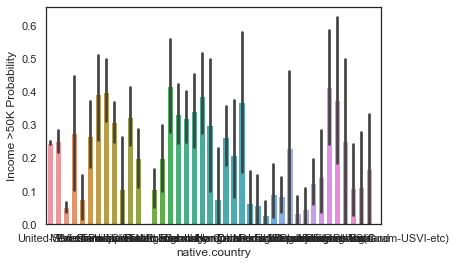

In [32]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

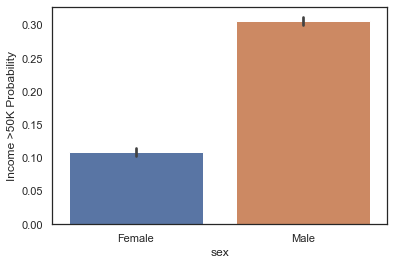

In [33]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


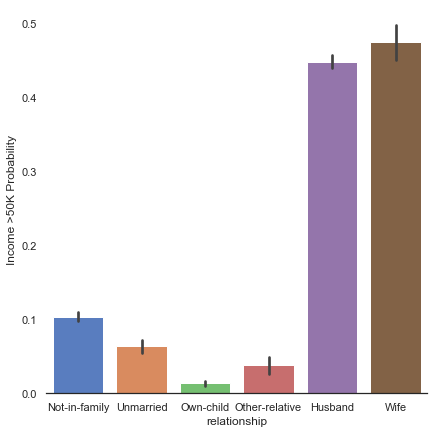

In [34]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


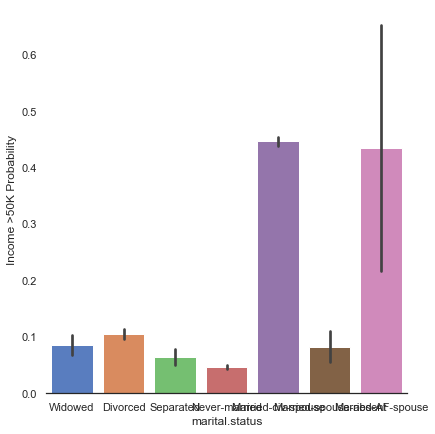

In [35]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


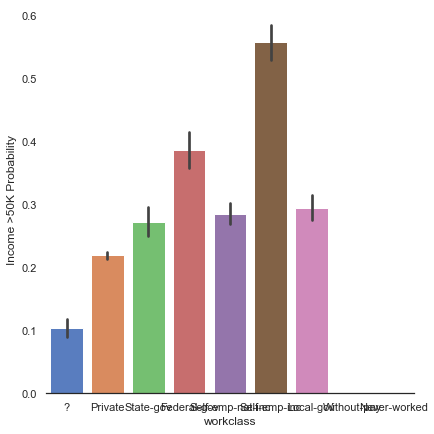

In [36]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

##4. Feature Engineering

In [10]:
####################################################
############### FEATURE ENGINEERING ################
####################################################
# Convert Sex value to 0 and 1
dataset["sex"] = dataset["sex"].map({"Male": 1, "Female":0})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  race  sex  capital.gain  \
0   90   77053              9               0     1    0             0   
1   82  132870              9               0     1    0             0   
2   66  186061             10               0     0    0             0   
3   54  140359              4               0     1    0             0   
4   41  264663             10               0     1    0             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


##5. Modeling

In [38]:
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    90  77053      9 ...      0      0   4356]
 [    82 132870      9 ...      0      0   4356]
 [    66 186061     10 ...      0      0   4356]
 ...
 [    40 154374      9 ...      1      0      0]
 [    58 151910      9 ...      0      0      0]
 [    22 201490      9 ...      1      0      0]]
Split Data: Y
[40 18 40 ... 40 40 20]


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##6. Algorithm Tuning

In [ ]:
####################################################
################ ALGORITHM TUNING ##################
####################################################
'''
Commented Out to Reduce Script Time - Took 20 Minutes to run.
best n_estimator = 250
best max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

##7. Finalize Model

In [23]:
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [39]:
dataset

,age,fnlwgt,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,0,4356,40,0
1,82,132870,9,0,1,0,0,4356,18,0
2,66,186061,10,0,0,0,0,4356,40,0
3,54,140359,4,0,1,0,0,3900,40,0
4,41,264663,10,0,1,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,1,1,0,0,40,0
32557,27,257302,12,1,1,0,0,0,38,0
32558,40,154374,9,1,1,1,0,0,40,1
32559,58,151910,9,0,1,0,0,0,40,0


## Fairness

In [11]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [12]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [13]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [14]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(dataset,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [15]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196276


In [7]:
data_orig_train = pd.read_pickle('../../Results/RF/1-income-prediction-84-369-accuracy_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/RF/1-income-prediction-84-369-accuracy_Test.pkl')

X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 250


In [17]:
final_metrics = []
accuracy = []
f1= []
from statistics import mean
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier


for i in range(0,10):
    
    data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
    print(i)
    X_train = data_orig_train.features
    y_train = data_orig_train.labels.ravel()

    X_test = data_orig_test.features
    y_test = data_orig_test.labels.ravel()
    model = RandomForestClassifier(n_estimators=50,max_features=5)
  
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)

    
element_wise_std =  np.std(final_metrics, 0, ddof=1)
print("STD " + str(element_wise_std))
final_metrics = list(map(mean, zip(*final_metrics)))
accuracy = mean(accuracy)
f1 = mean(f1)
final_metrics[4] = np.log(final_metrics[4])
print(final_metrics)
print(sum(final_metrics[1:]))
print(accuracy)
print(f1)

0
1
2
3
4
5
6
7
8
9
STD [3.02765035e+00 6.36710338e-03 3.88303554e-02 2.10859948e-02
 1.59440031e-02 2.92369393e-03]
[4.5, -0.19230101306633807, -0.1199692321391786, 0.10560023213396898, -1.2471906516043778, 0.12649038776435792]
-1.3273702769115676
0.8392670693008496
0.6415426794255741


In [45]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 250

model = RandomForestClassifier(n_estimators=250,max_features=5)


mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [46]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i, max_features=5)

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [47]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

       0         1         2         3         4         5
0      1 -0.199011 -0.104514  0.107236  0.355695  0.133923
1      2 -0.133256 -0.072311  0.063151  0.325907  0.160947
2      3 -0.189698 -0.130426  0.113318  0.333516  0.138297
3      4 -0.155798 -0.075724  0.072056  0.321322  0.145326
4      5 -0.183829 -0.096643  0.093573  0.330824  0.133794
..   ...       ...       ...       ...       ...       ...
245  246 -0.191594 -0.133396  0.110765  0.284688  0.128401
246  247 -0.192954 -0.130489  0.110199  0.284903  0.127847
247  248 -0.190654 -0.128049  0.107961  0.289007  0.128298
248  249 -0.191416 -0.128049  0.108516  0.288188  0.128459
249  250 -0.191142 -0.132675  0.109758  0.284336  0.127465

[250 rows x 6 columns]


,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T240,T241,T242,T243,T244,T245,T246,T247,T248,T249
accuracy,0.842154,0.809704,0.824752,0.816563,0.832224,0.827618,0.837445,0.829665,0.831713,0.832122,...,0.841028,0.841744,0.842154,0.841642,0.842051,0.840516,0.840414,0.840311,0.839799,0.842154
f1,0.650973,0.612789,0.563933,0.609926,0.606483,0.627104,0.625118,0.630551,0.613540,0.636525,...,0.650461,0.649909,0.651919,0.651341,0.651457,0.647830,0.648795,0.647856,0.647125,0.650973
statistical_parity_difference,-0.191142,-0.199011,-0.133256,-0.189698,-0.155798,-0.183829,-0.175903,-0.183390,-0.173547,-0.187857,...,-0.191245,-0.189446,-0.189726,-0.190330,-0.189732,-0.191594,-0.192954,-0.190654,-0.191416,-0.191142
equal_opportunity_difference,-0.132675,-0.104514,-0.072311,-0.130426,-0.075724,-0.096643,-0.105494,-0.114404,-0.118354,-0.115889,...,-0.123444,-0.121725,-0.122956,-0.120282,-0.121979,-0.133396,-0.130489,-0.128049,-0.128049,-0.132675
average_abs_odds_difference,0.109758,0.107236,0.063151,0.113318,0.072056,0.093573,0.093791,0.100105,0.099159,0.102543,...,0.105992,0.104395,0.104703,0.104032,0.104391,0.110765,0.110199,0.107961,0.108516,0.109758
disparate_impact,-1.257599,-1.033681,-1.121144,-1.098065,-1.135312,-1.106168,-1.282183,-1.111485,-1.237111,-1.144341,...,-1.235000,-1.242519,-1.232165,-1.231600,-1.235018,-1.256360,-1.255606,-1.241304,-1.244144,-1.257599
theil_index,0.127465,0.133923,0.160947,0.138297,0.145326,0.133794,0.138492,0.132840,0.141972,0.130734,...,0.127236,0.127845,0.126964,0.127042,0.127164,0.128401,0.127847,0.128298,0.128459,0.127465


In [14]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(0,10):

    #model = RandomForestClassifier(n_estimators=250,max_features=5, bootstrap = True)
    model = ExtraTreesClassifier(n_estimators=250,max_features=5, bootstrap = True)

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    print(fair_list)
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


[-0.19325903366566616, -0.1343514378997972, 0.11320110640831814, 0.2845814654364161, 0.1305764394884733]
[-0.19016519223783335, -0.12170407894290419, 0.10612719479517732, 0.2936413595970337, 0.13060826074683857]
[-0.1946503365769059, -0.13825578148203244, 0.11512694055378839, 0.2806496016921111, 0.12939207865026753]
[-0.18923765696367353, -0.13046797316024772, 0.10880622163728085, 0.29628923479645847, 0.1298681142646603]
[-0.19325903366566616, -0.1367916526386942, 0.11386652107752257, 0.2845814654364161, 0.1298362139645947]
[-0.19325903366566616, -0.13532752379535606, 0.11346727227599995, 0.2845814654364161, 0.13028034927892182]
[-0.19110507059579307, -0.13070155521279458, 0.1103582971214595, 0.28934495585591646, 0.13056518420804578]
[-0.1927890944866863, -0.13362981289947096, 0.11233135993647636, 0.2867238693822149, 0.12993186023341532]
[-0.18818227582538677, -0.1277732975261181, 0.10763500217174826, 0.29582020530180614, 0.13123080801663428]
[-0.19184304458682666, -0.11903028215146033

In [15]:
from __future__ import division
def mean(a):
    return sum(a) / len(a)

print(list(map(mean, zip(*final_metrics))))
final_metrics = list(map(mean, zip(*final_metrics)))

print(mean(accuracy))
print(mean(f1))

[-0.1917749772270104, -0.13080333957088758, 0.11071066546692958, 0.2888036257894679, 0.1303098548430297]
0.8368922100522059
0.6412067585429136


In [16]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[0][3] = np.log(final_result[0][3])
print(final_result)

          0
0 -0.191775
1 -0.130803
2  0.110711
3 -1.242008
4  0.130310


In [95]:
fair.to_excel("Adult_Fairness.xlsx")

In [106]:
from openpyxl import load_workbook

path = "../Adult_Fairness.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter("../Adult_Fairness.xlsx", engine='openpyxl')
writer.book = book
writer.sheets = {ws.title: ws for ws in book.worksheets}

fair.to_excel(writer, startrow=writer.sheets['RF'].max_row, index = False)
writer.save()